In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import plot as up_plt
from datetime import datetime

plt.style.use('ggplot')
%matplotlib inline

In [2]:
DIMENSIONS_RES_PATH = "../res/dimensions/export.csv"

In [3]:
df_dim = pd.read_csv(DIMENSIONS_RES_PATH)

print(len(df_dim.index))
df_dim.head(5)

4797


,Date added,Publication ID,DOI,PMID,PMCID,Title,Abstract,Source title,Source UID,Publisher,...,Research Organizations - standardized,GRID IDs,City of Research organization,Country of Research organization,Funder,UIDs of supporting grants,Times cited,Altmetric,Source Linkout,Dimensions URL
0,2020-03-23,pub.1125820003,10.29333/ejgm/7850,NaN,NaN,The Possible Immunological Pathways for the Va...,NaN,Electronic Journal of General Medicine,jour.1371209,Modestum,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,https://app.dimensions.ai/details/publication/...
1,2020-03-23,pub.1125819565,10.21203/rs.3.rs-18190/v1,NaN,NaN,A Method of Estimating Time-to-Recovery for a ...,NaN,Research Square,jour.1380788,Research Square,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,https://app.dimensions.ai/details/publication/...
2,2020-03-23,pub.1125819661,10.2196/preprints.18821,NaN,NaN,Preparation for the quarantine of the cruise s...,"<sec xmlns=""http://www.ncbi.nlm.nih.gov/JATS1""...",JMIR Preprints,jour.1345647,JMIR Publications,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,http://dx.doi.org/10.2196/preprints.18821,https://app.dimensions.ai/details/publication/...
3,2020-03-23,pub.1125818201,10.26355/eurrev_202003_20551,32196628.0,NaN,Differences and similarities between Severe Ac...,NaN,European review for medical and pharmacologica...,jour.1092032,NaN,...,University of Catania,grid.8158.4,Catania,Italy,NaN,NaN,0,1.0,NaN,https://app.dimensions.ai/details/publication/...
4,2020-03-23,pub.1125818268,10.3760/cma.j.cn112147-20200315-00339,32198915.0,NaN,[When COVID-19 encounters interstitial lung di...,"In December 2019, a new type of coronavirus pn...",中华结核和呼吸杂志,jour.1097577,NaN,...,First Affiliated Hospital of Xi'an Jiaotong Un...,grid.452438.c,Xi'an,China,NaN,NaN,0,1.0,NaN,https://app.dimensions.ai/details/publication/...


In [4]:
df_dim.isna().sum().sort_values(ascending=False)

MeSH terms                               4422
UIDs of supporting grants                4406
PMCID                                    4365
Funder                                   4111
Corresponding Authors                    3731
Issue                                    2960
Volume                                   2491
PMID                                     2351
Source Linkout                           1955
GRID IDs                                 1858
Research Organizations - standardized    1858
City of Research organization            1858
Country of Research organization         1858
Abstract                                 1683
Pagination                               1557
Altmetric                                1466
Publisher                                 593
Authors                                   470
Authors Affiliations                      470
Source UID                                280
Source title                              280
DOI                               

In [5]:
#mis_vals = df_dim.isna().groupby(df_dim.columns.tolist()).size()
#up_plt(mis_vals, orientation='vertical', show_percentages=True, sort_by='cardinality')
#plt.show()

Elsevier                           1108
Cold Spring Harbor Laboratory       660
Springer Nature                     492
Wiley                               322
Taylor & Francis                    140
BMJ                                 128
Research Square                     116
Oxford University Press (OUP)        95
MDPI                                 94
American Chemical Society (ACS)      86
Name: Publisher, dtype: int64

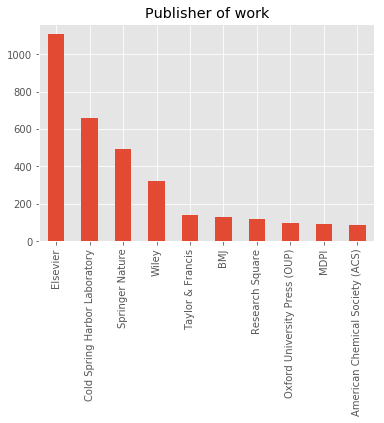

In [6]:
df_dim.Publisher.value_counts().head(10).plot(kind='bar', title='Publisher of work')
df_dim.Publisher.value_counts().head(10)

In [7]:
df_dim['parsed_date'] = pd.to_datetime(df_dim['Publication Date'])

NA 0


parsed_date
2020-03-31    2034
2020-02-29    1016
2020-01-31     827
2020-04-30     172
2020-12-31      66
2020-05-31      45
2020-06-30      31
2020-07-31       7
2020-08-31       3
2020-09-30       2
Name: Publisher, dtype: int64

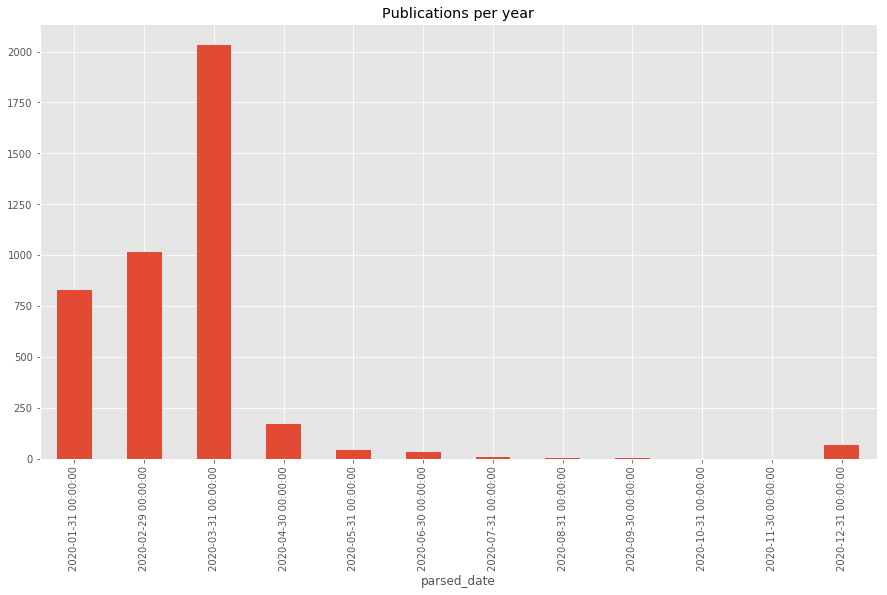

In [8]:
df_dim.set_index('parsed_date').resample('m').count()['Publisher'].plot(kind='bar', figsize=(15,8), title='Publications per year')
print('NA', df_dim.parsed_date.isna().sum())
df_dim.set_index('parsed_date').resample('m').count()['Publisher'].sort_values(ascending=False).head(10)

article       3923
preprint       609
chapter        213
book            40
monograph       11
proceeding       1
Name: Publication Type, dtype: int64

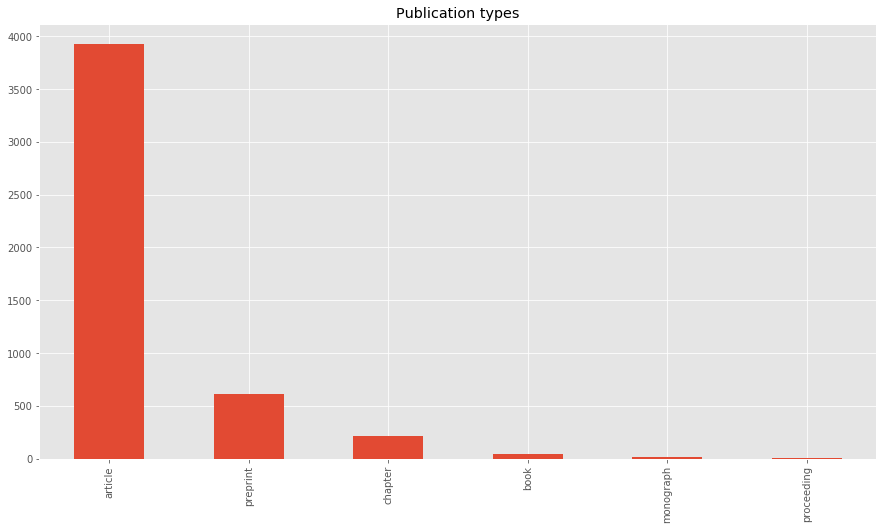

In [9]:
df_dim['Publication Type'].value_counts().plot(kind='bar', title='Publication types', figsize=(15,8))
df_dim['Publication Type'].value_counts()

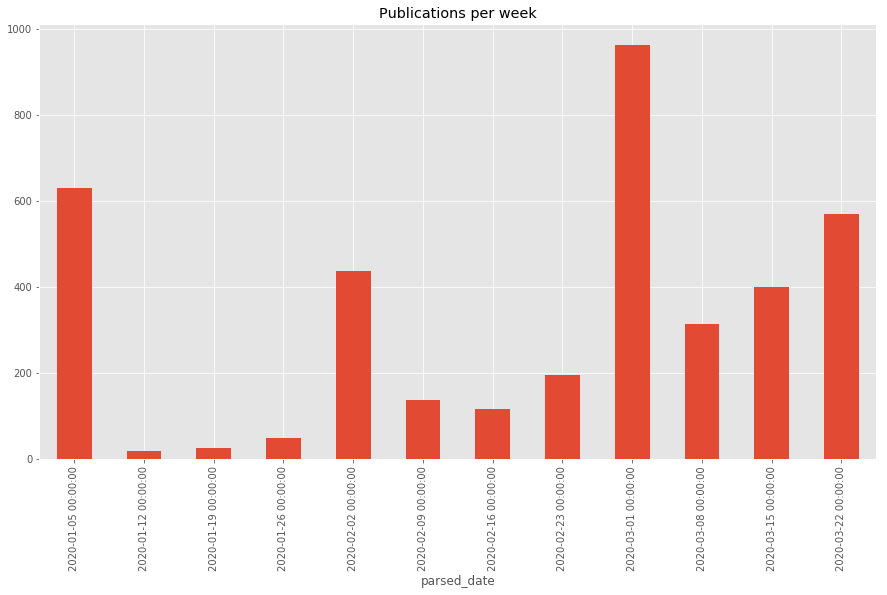

In [19]:
df_dim[df_dim['parsed_date'] < pd.Timestamp(2020,3,23)].set_index('parsed_date').resample('w').count()['Publisher'].plot(kind='bar', figsize=(15,8), title='Publications per week')